tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

In [1]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 30
CHANNELS = 3 # RGB channels

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10
)

for splitting the image folder into train, validation
and test sets, you can use split_folders tool

In [4]:
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\tarus\deep_learning_codebasics\tomato_classification\training\dataset\train",
    target_size=(256,256),
    batch_size=32,
    class_mode="sparse"
)

Found 11203 images belonging to 10 classes.


In [5]:
val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\tarus\deep_learning_codebasics\tomato_classification\training\dataset\val",
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse' # sparse does label encoding of class labels
)

Found 1597 images belonging to 10 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10
)

test_generator = val_datagen.flow_from_directory(
    r"C:\Users\tarus\deep_learning_codebasics\tomato_classification\training\dataset\test",
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse' # sparse does label encoding of class labels
)

Found 3211 images belonging to 10 classes.


In [7]:
num_classes = 10
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS) # CHANNELS = RGB CHANNELS
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(num_classes,activation="softmax")
])

model.build(input_shape=input_shape)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
# train steps
11203/32 

350.09375

In [11]:
# val steps
1597/32

49.90625

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=350,
    validation_data=val_generator,
    validation_steps=50,
    epochs=15,
    verbose=1
)

Epoch 1/15
350/350 [==============================] - 249s 685ms/step - loss: 1.6751 - accuracy: 0.4024 - val_loss: 1.2520 - val_accuracy: 0.5867
Epoch 2/15
350/350 [==============================] - 245s 700ms/step - loss: 1.0292 - accuracy: 0.6392 - val_loss: 0.8542 - val_accuracy: 0.7082
Epoch 3/15
350/350 [==============================] - 294s 840ms/step - loss: 0.6466 - accuracy: 0.7721 - val_loss: 0.6745 - val_accuracy: 0.7652
Epoch 4/15
350/350 [==============================] - 245s 698ms/step - loss: 0.4919 - accuracy: 0.8305 - val_loss: 0.5366 - val_accuracy: 0.8172
Epoch 5/15
350/350 [==============================] - 232s 663ms/step - loss: 0.3934 - accuracy: 0.8593 - val_loss: 0.3592 - val_accuracy: 0.8704
Epoch 6/15
350/350 [==============================] - 234s 667ms/step - loss: 0.3303 - accuracy: 0.8841 - val_loss: 0.2984 - val_accuracy: 0.8992
Epoch 7/15
350/350 [==============================] - 231s 658ms/step - loss: 0.2847 - accuracy: 0.8976 - val_loss: 0.2563 -

In [13]:
model.evaluate(test_generator)

101/101 [==============================] - 101s 993ms/step - loss: 0.2451 - accuracy: 0.9253


[0.2451252043247223, 0.9252569079399109]

In [14]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

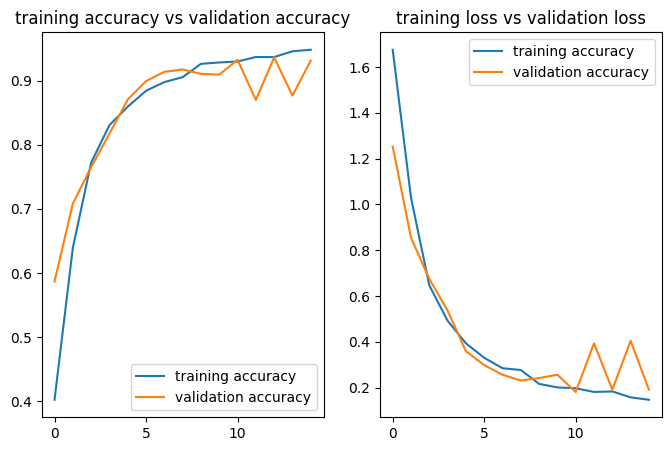

In [15]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.plot(range(history.params['epochs']), accuracy, label="training accuracy")
plt.plot(range(history.params['epochs']), val_accuracy, label="validation accuracy")
plt.title("training accuracy vs validation accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(history.params['epochs']), loss, label="training accuracy")
plt.plot(range(history.params['epochs']), val_loss, label="validation accuracy")
plt.title("training loss vs validation loss")
plt.legend()

In [16]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.round(100 * max(predictions[0]), 2)

    return predicted_class,confidence

In [17]:
class_names = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

1/1 [==============================] - 0s 29ms/step


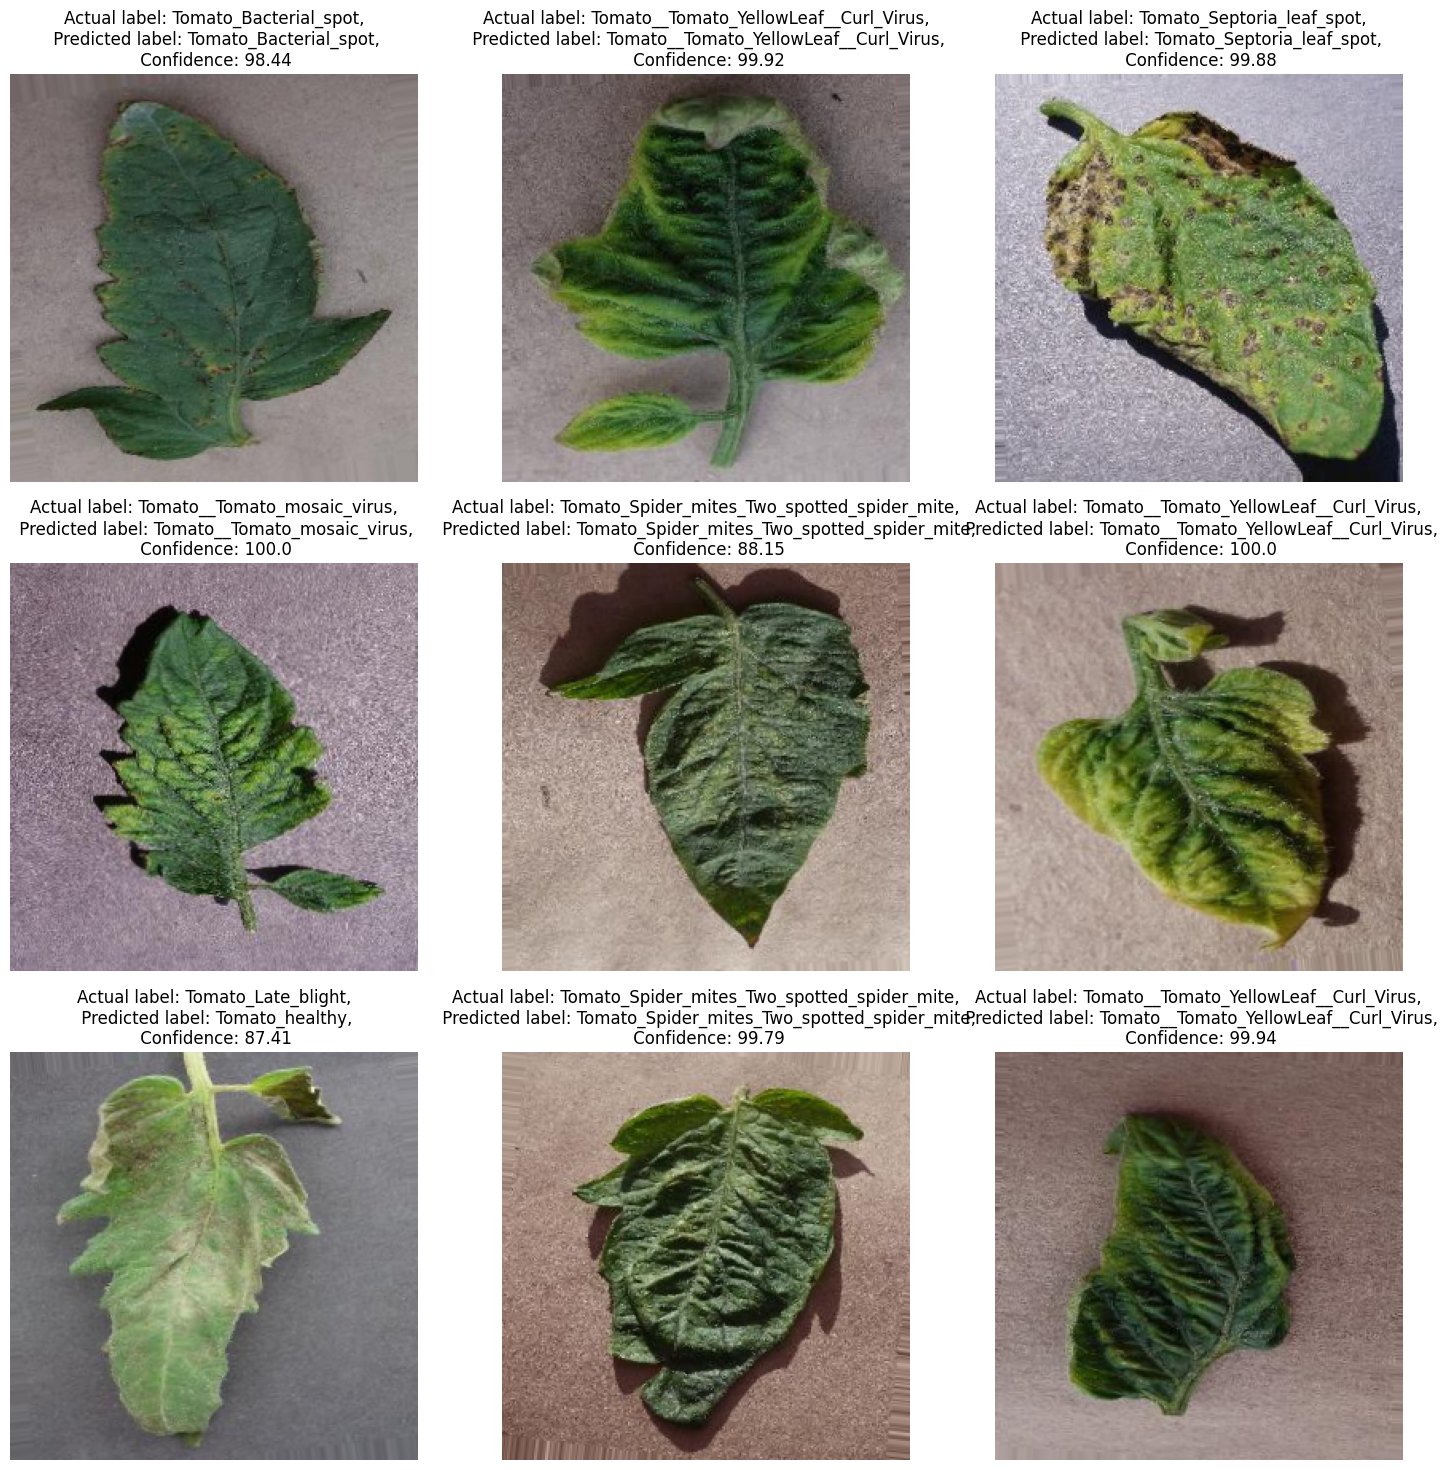

In [18]:
import numpy as np
plt.figure(figsize=(18,18))
for images,labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model,images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual label: {actual_class},\n Predicted label: {predicted_class},\n Confidence: {confidence}")
        plt.axis('off')
    break

In [19]:
model.save('../tomatoes.h5') # using this for cloud deployment